# Neural Network

## NN for Binary Classification
![1](images/NN/1.png)

In [8]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

device = torch.device('cuda')

cuda


### Data Preparation

In [2]:
# Load Data
train = pd.read_csv("data/NN/train_q3.csv")
test = pd.read_csv("data/NN/test_q3.csv")

train_x = torch.tensor(train[["x"]].values, device=device).float()
train_y = torch.tensor(train[["y"]].values, device=device).float()
test_x = torch.tensor(test[["x"]].values, device=device).float()
test_y = torch.tensor(test[["y"]].values, device=device).float()

print(train_x)
print(f"x shape: {train_x.shape} y shape: {train_y.shape}")

# Initial Weights
w1 = torch.tensor([[0.12, 0.26, -0.15]], device=device,
                  requires_grad=True).float()
w2 = torch.tensor([[0.11], [0.13], [0.07]], device=device,
                  requires_grad=True).float()
print(f"w1 shape: {w1.shape} w2 shape {w2.shape}")

# Default Params
iterations = 50
decay_factor = 0.3
decay_interval = 20

learning_rate = 0.5
train_loss = []


tensor([[ 0.3394],
        [ 0.2107],
        [-0.3598],
        ...,
        [-0.1718],
        [ 0.0789],
        [ 0.1558]], device='cuda:0')
x shape: torch.Size([10000, 1]) y shape: torch.Size([10000, 1])
w1 shape: torch.Size([1, 3]) w2 shape torch.Size([3, 1])


### Train

In [3]:
# Utils
def lr_decay(lr, iter):
    return lr * pow(decay_factor, iter // decay_interval)

# Training
for t in range(iterations):
    y_pred = train_x.mm(w1).clamp(min=0).mm(w2)
    loss = torch.nn.functional.binary_cross_entropy_with_logits(
        y_pred, train_y, reduction="mean")
    train_loss.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        w1.grad.zero_()
        w2.grad.zero_()
    
    learning_rate = lr_decay(learning_rate, t)


### Eval

tensor([[ 0.2253,  0.4107, -0.1328]], device='cuda:0', requires_grad=True)
tensor([[ 0.2203,  0.3450, -0.0196]], device='cuda:0', grad_fn=<TBackward>)
Test Accuracy: 100.000 %


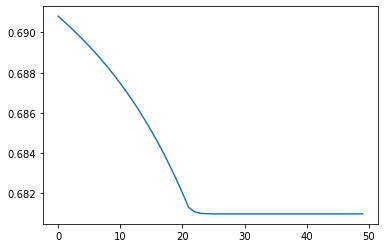

In [4]:
def evaluate(test_x, test_y, w1, w2, threshold=0.5):
    y_pred = test_x.mm(w1).clamp(min=0).mm(w2)
    y_pred = torch.sigmoid(y_pred) > threshold
    print(
        f'Test Accuracy: {100 * y_pred.eq(test_y).sum().item() / len(test_y):.3f} %')

def plot(iterations, loss):
    plt.plot([_ for _ in range(iterations)], loss)
    plt.show

print(w1)
print(w2.t())
evaluate(test_x, test_y, w1, w2)
plot(iterations, train_loss)

## NN for Multi-Class Classification
![](images/NN/2.png)

### Data

In [5]:
# Load Data
train = pd.read_csv("data/NN/train_q4.csv")
test = pd.read_csv("data/NN/test_q4.csv")

train_x = torch.tensor(train[["x1", "x2"]].values, device=device).float()
train_y = torch.tensor(train["y"].values, device=device)
test_x = torch.tensor(test[["x1", "x2"]].values, device=device).float()
test_y = torch.tensor(test["y"].values, device=device)

print(train_x)
print(f"x shape: {train_x.shape} y shape: {train_y.shape}")

# Initial Weights
w1 = torch.tensor(
    [[ 0.74, 0.10,  0.98],
    [-2.04, -1.40, -0.31]], device=device, requires_grad=True)
w2 = torch.tensor(torch.tensor(
    [[ 1.37, -0.90, -0.80],
    [-0.08,  0.94,  0.47],
    [-0.30,  0.57,  0.93]]).t().tolist(), device=device, requires_grad=True)
print(f"w1 shape: {w1.shape} w2 shape {w2.shape}")

# Default Params
iterations = 50
decay_factor = 0.3
decay_interval = 20

learning_rate = 0.1
train_loss = []


tensor([[-2.2928, -0.6392],
        [ 4.7084, -0.1297],
        [-1.7402,  6.4496],
        ...,
        [ 5.0110, -1.7008],
        [ 1.4483,  1.4732],
        [ 2.3472,  0.0876]], device='cuda:0')
x shape: torch.Size([10000, 2]) y shape: torch.Size([10000])
w1 shape: torch.Size([2, 3]) w2 shape torch.Size([3, 3])


In [6]:
# Training
for t in range(iterations):
    y_pred = train_x.mm(w1).clamp(min=0).mm(w2)
    loss = torch.nn.functional.nll_loss(
        torch.nn.LogSoftmax(dim=1)(y_pred), train_y)
    train_loss.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

    learning_rate = lr_decay(learning_rate, t)


In [7]:
def evaluate(test_x, test_y, w1, w2):
    y_pred = test_x.mm(w1).clamp(min=0).mm(w2)
    y_pred = torch.softmax(y_pred, dim=1).max(1)[1]
    print(
        f'Test Accuracy: {100 * y_pred.eq(test_y).sum().item() / len(test_y):.3f} %')


print(w1)
print(w2.t())
evaluate(test_x, test_y, w1, w2)
plot(iterations, train_loss)

tensor([[ 0.9945, -0.2716,  0.9460],
        [-2.0672, -1.4132,  0.1083]], device='cuda:0', requires_grad=True)
tensor([[ 1.5217, -0.9055, -0.7222],
        [-0.0799,  1.0191,  0.9763],
        [-0.4518,  0.4963,  0.3459]], device='cuda:0', grad_fn=<TBackward>)
Test Accuracy: 93.950 %
